Programming exercise 1: Linear Regression

Linear Regression with one variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X  = np.insert(X,0,1,axis=1)


Text(0.5, 0, 'Population of city in 10,000s')

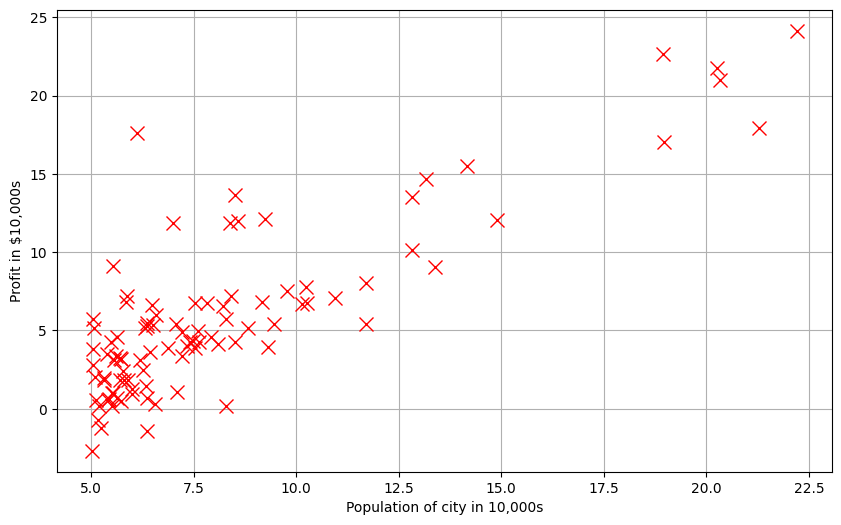

In [3]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of city in 10,000s')

In [4]:
iterations = 1500
alpha = 0.01

In [5]:
def h(theta, X):
    return np.dot(X, theta)

def computeCost(mytheta, X, y):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    # Ensure y is a column vector
    y = y.reshape(-1, 1)
    error = h(mytheta, X) - y
    return float((1.0 / (2 * m)) * np.dot(error.T, error)[0, 0])

initial_theta = np.zeros((X.shape[1], 1))
print(computeCost(initial_theta, X, y))

32.072733877455676


In [6]:
def descendGradient(X, theta_start=None):
    """
    theta_start is an n-dimensional vector of initial theta guess
    X is matrix with n-columns and m-rows
    """
    if theta_start is None:
        theta = np.zeros((X.shape[1], 1))
    else:
        theta = theta_start.copy()
        if theta.ndim == 1:
            theta = theta.reshape(-1, 1)
    jvec = []
    thetahistory = []
    for _ in range(iterations):
        jvec.append(computeCost(theta, X, y))
        thetahistory.append(theta.flatten().tolist())
        gradient = (1/m) * np.dot(X.T, h(theta, X) - y)
        theta = theta - alpha * gradient
    return theta, thetahistory, jvec

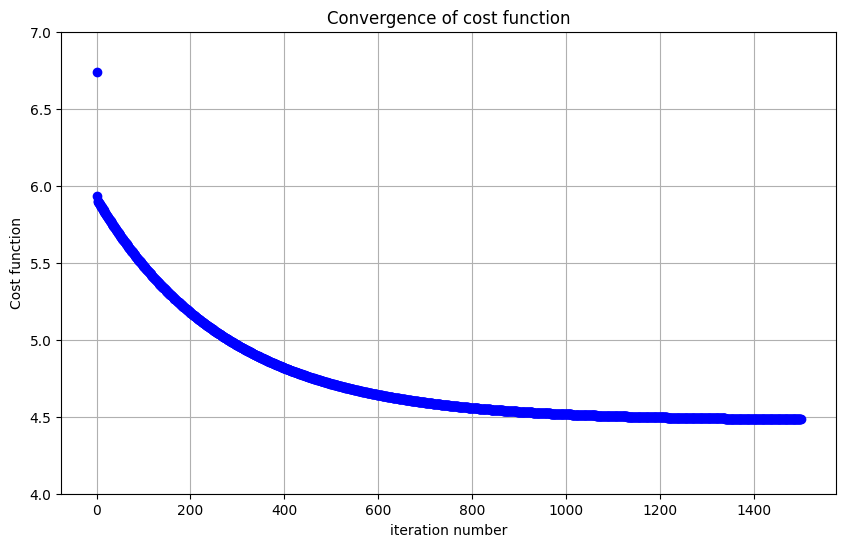

In [7]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of cost function")
    plt.xlabel("iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
plotConvergence(jvec)
dummy = plt.ylim([4, 7])


C:\Users\Sakshan Sharma\AppData\Local\Temp\ipykernel_15384\3667975902.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(X[:,1],myfit(X[:,1]), 'b-',label = 'Hypothesis: h(x) = %0.2f - %0.2fx'%(theta[0],theta[1]))


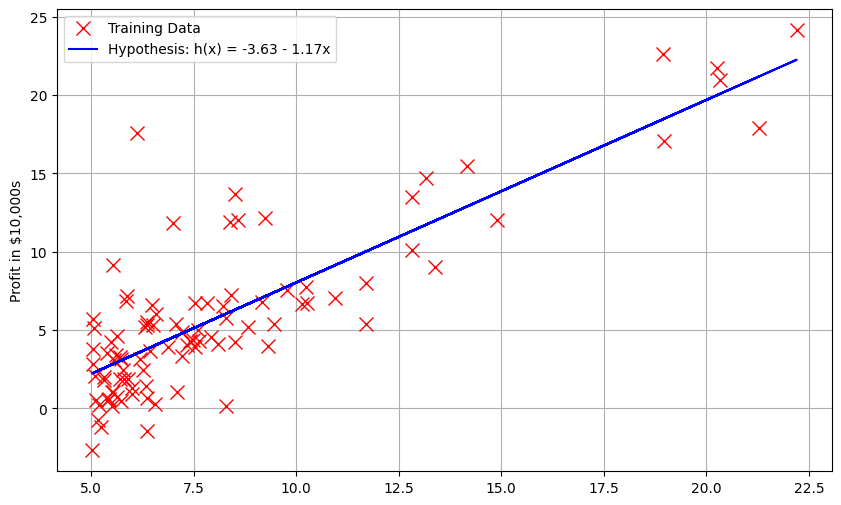

In [8]:
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]), 'b-',label = 'Hypothesis: h(x) = %0.2f - %0.2fx'%(theta[0],theta[1]))
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.legend()

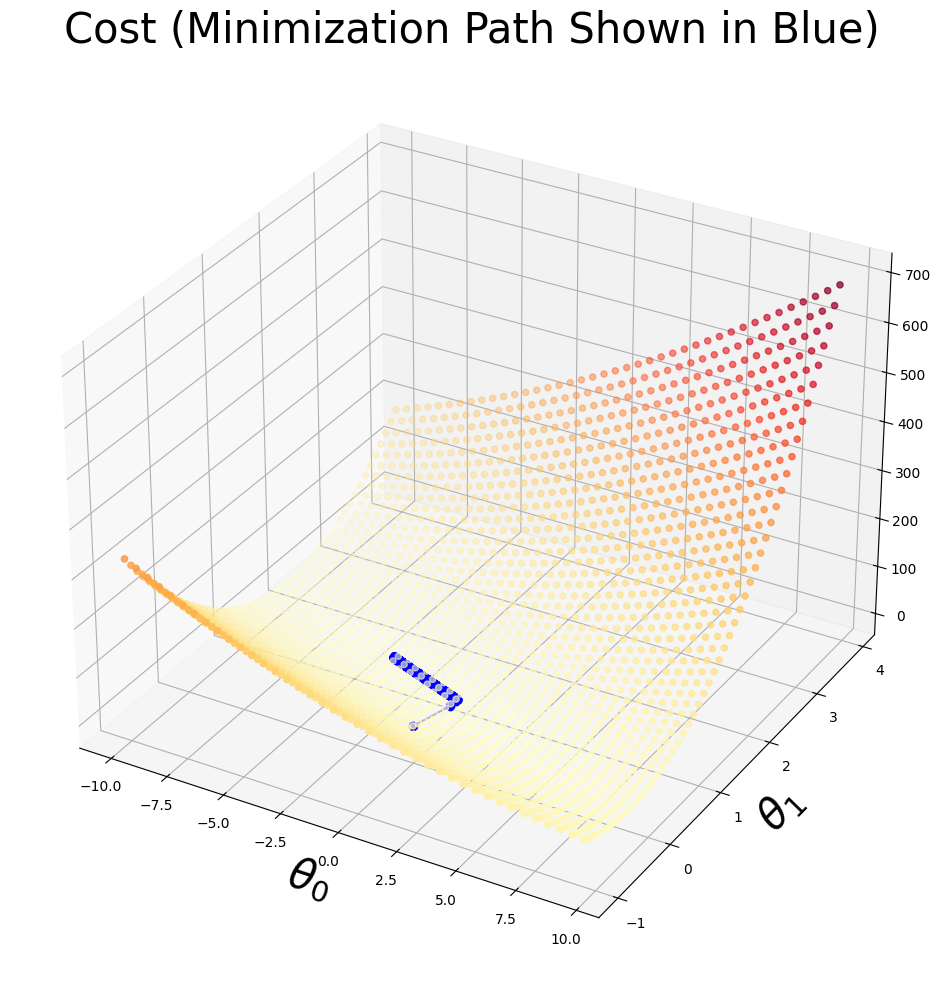

In [9]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))
scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap(('YlOrRd')))
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()

Linear Regression with multiple variables

In [10]:
datafile = 'data/ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.transpose(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

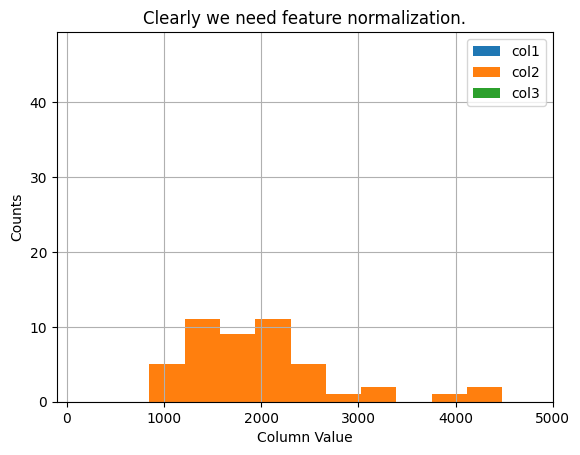

In [11]:
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label='col1')
dummy = plt.hist(X[:,1],label='col2')
dummy = plt.hist(X[:,2],label='col3')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [12]:
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    mean = np.mean(Xnorm[:,icol])
    std = np.std(Xnorm[:,icol])
    stored_feature_means.append(mean)
    stored_feature_stds.append(std)
    if icol > 0:
        Xnorm[:,icol] = (Xnorm[:,icol] - mean) / std

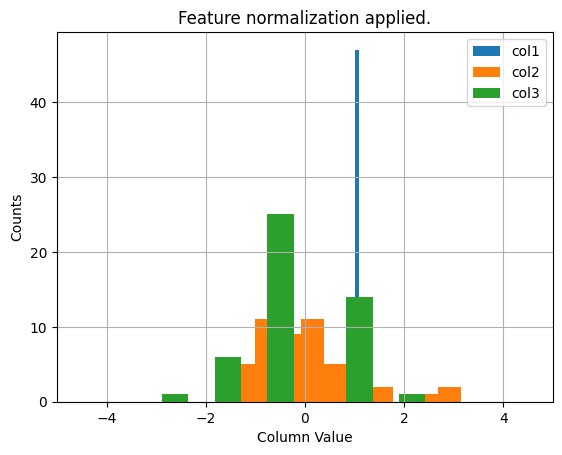

In [13]:
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label='col1')
dummy = plt.hist(Xnorm[:,1],label='col2')
dummy = plt.hist(Xnorm[:,2],label='col3')
plt.title('Feature normalization applied.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

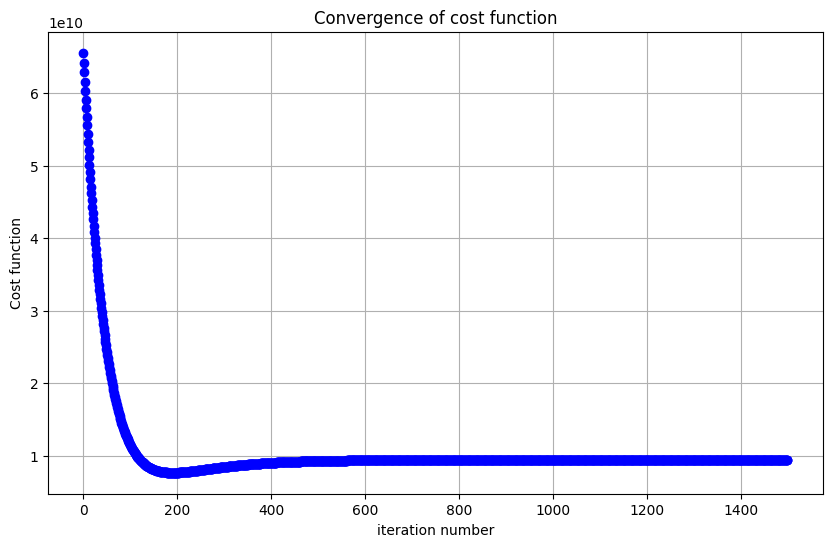

In [14]:
initial_theta = np.zeros((Xnorm.shape[1], 1))
theta, thetahistory, jvec = descendGradient(Xnorm, initial_theta)
plotConvergence(jvec)

In [15]:
print ("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
ytestscaled = np.array(ytestscaled).reshape(1, -1)
final_theta = theta[:, -1].reshape(-1, 1) if theta.shape[1] > 1 else theta
prediction = h(final_theta, ytestscaled)
print ("$%0.2f" % prediction.item())

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$239499.93


In [16]:
from numpy.linalg import inv
def normEqtn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [17]:
print("Normal equation prediction for price of house with 1650 square feet and 3 bedrooms")
x_test = np.array([1, 1650., 3]).reshape(1, -1)
theta_ne = normEqtn(X, y.reshape(-1, 1))
prediction = h(theta_ne, x_test)
print("$%0.2f" % prediction.item())

Normal equation prediction for price of house with 1650 square feet and 3 bedrooms
$293081.46
